# Explorations on non-parametric tests

## Kolmogorov–Smirnov test


The K-S test is a test for determining if two samples are from the same distribution, or one sample is from a given distribution. It is based on the K-S statistic, which is the maximum (over all possible values) of the difference of (empirical) cumulative distribution functions. So it will range between 0 and 1.

What does the distribution of the K-S test statistic look like?

Assume `n1` values in the first sample, and `n2` values in the second sample.

It doesn't really matter the underlying distribution.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def get_single_ks_statistic(n0, n1):
    values = np.random.choice(np.concatenate([np.zeros(n0), np.ones(n1)]),
                              n0+n1,
                              replace=False)
    return np.abs(np.where(values, -1/n1, 1/n0).cumsum()).max()

    

In [9]:
diffs = get_single_ks_statistic(10, 20)

In [10]:
diffs

0.3

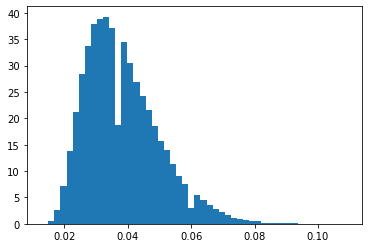

In [18]:
fig, ax = plt.subplots()
values = [get_single_ks_statistic(1000, 1000) for _ in range(100000)]
ax.hist(values, bins=50, density=True)
None

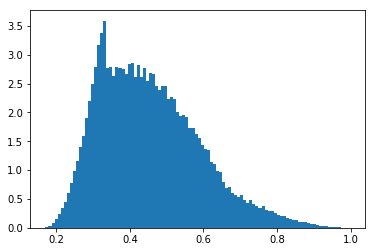

In [168]:
fig, ax = plt.subplots()
values = [get_single_ks_statistic(3, 1000) for _ in range(1000000)]
ax.hist(values, bins=100, density=True)
None

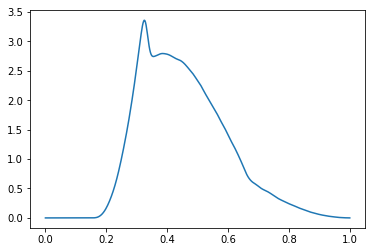

In [175]:
fig, ax = plt.subplots()
values = [get_single_ks_statistic(3, 5000) for _ in range(1000000)]
kde = stats.gaussian_kde(values)
xs = np.linspace(0, 1, 500)
ax.plot(xs, kde(xs))
None

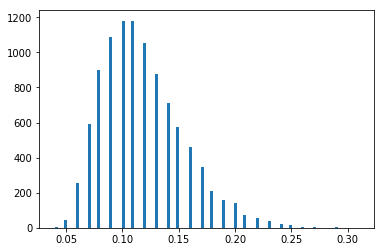

In [158]:
fig, ax = plt.subplots()
values = [get_single_ks_statistic(100, 100) for _ in range(10000)]
ax.hist(values, bins=100)
None